<a href="https://colab.research.google.com/github/sahoomrutyunjaya12345/TopicModellingonNewsArticle/blob/main/TopicModellingOnNewsArticle_CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Extraction/identification of major topics & themes discussed in news articles. 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member  -**   Mrutyunjaya Sahoo


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**In this project our task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.**

###**Data Description**

**The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
!pip install contractions
!pip install pyLDAvis  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 91.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are 

In [3]:
!pip install beautifulsoup4
!pip install nltk
!pip install wordcloud
!pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Python library used to scrape data from webpages
from bs4 import BeautifulSoup
# Module which provides regular expression matching operations
import re
# For string manipulation
import string
# Popular library to pre-process the text in NLP
import nltk
# Downloading stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
## Stopwords package from nltk
from nltk.corpus import stopwords
# Create interactive wordclouds
from wordcloud import WordCloud
# Ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# Mounting thr drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = '/content/drive/MyDrive/AlmaBetter/NEWS POPULARITY PREDICTION CAPSTONE/bbc/'

In [7]:
news = []                                                                        ## Empty list for storing actual news in text       
topics = []                                                                      ## Empty list for new theme

In [8]:
Themes = ['business','entertainment','politics','sport','tech']  ## News themes 

In [9]:
for x in Themes:                                                                 ## For every item in Themes
    all_txt_files=sorted(os.listdir(path+x))                                     ## List all files present in given directory in sorted order
    for files in all_txt_files:                                                  ## For every item in txt_files
        txt_path=path + x + '/' + files                                          ## specifying exact path of every text news file
        with open(txt_path,'rb') as f:                                           ## open a text file
            text=f.read()                                                        ## read text file
        news.append(text)                                                        ## append text file which is our news, to empty news list
        topics.append(x)                                                         ## append the topic of news file to empty topics list

In [10]:
# Creating an empty dataframe
news_data = pd.DataFrame()  

In [11]:
# Adding both new column
news_data['News_text'] = news                                                    
news_data['News_Theme'] = topics  

news_data.head()
     

,News_text,News_Theme
0,b'Ad sales boost Time Warner profit\n\nQuarter...,business
1,b'Dollar gains on Greenspan speech\n\nThe doll...,business
2,b'Yukos unit buyer faces loan claim\n\nThe own...,business
3,b'High fuel prices hit BA\'s profits\n\nBritis...,business
4,"b""Pernod takeover talk lifts Domecq\n\nShares ...",business


In [12]:
# checking the last 5 dataset
news_data.tail()

,News_text,News_Theme
2220,b'BT program to beat dialler scams\n\nBT is in...,tech
2221,b'Spam e-mails tempt net shoppers\n\nComputer ...,tech
2222,b'Be careful how you code\n\nA new European di...,tech
2223,b'US cyber security chief resigns\n\nThe man m...,tech
2224,b'Losing yourself in online gaming\n\nOnline r...,tech


In [13]:
# Checking the dataset rows and colimns
news_data.shape

(2225, 2)

In [14]:
# Checking the columns of the dataset
news_data.columns

Index(['News_text', 'News_Theme'], dtype='object')

In [15]:
# Creating a copy of it
data_df = news_data.copy()

In [16]:
# Checking the info about dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   News_text   2225 non-null   object
 1   News_Theme  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [17]:
# checking the no. of duplicates in the dataset
data_df.duplicated().sum()

98

In [18]:
# dropping the duplicates
data_df.drop_duplicates(keep = 'first',inplace=True)
data_df.shape

(2127, 2)

In [19]:
# Checking the info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2127 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   News_text   2127 non-null   object
 1   News_Theme  2127 non-null   object
dtypes: object(2)
memory usage: 49.9+ KB


In [20]:
# Checking for missing/Null values
data_df.isnull().sum()

News_text     0
News_Theme    0
dtype: int64

In [21]:
# Checking the count,std,etc on variables
data_df.describe()

,News_text,News_Theme
count,2127,2127
unique,2127,5
top,b'Ad sales boost Time Warner profit\n\nQuarter...,sport
freq,1,505


In [22]:
# Checking the valuecounts of dataset
data= data_df['News_Theme'].value_counts()
data

sport            505
business         503
politics         403
entertainment    369
tech             347
Name: News_Theme, dtype: int64

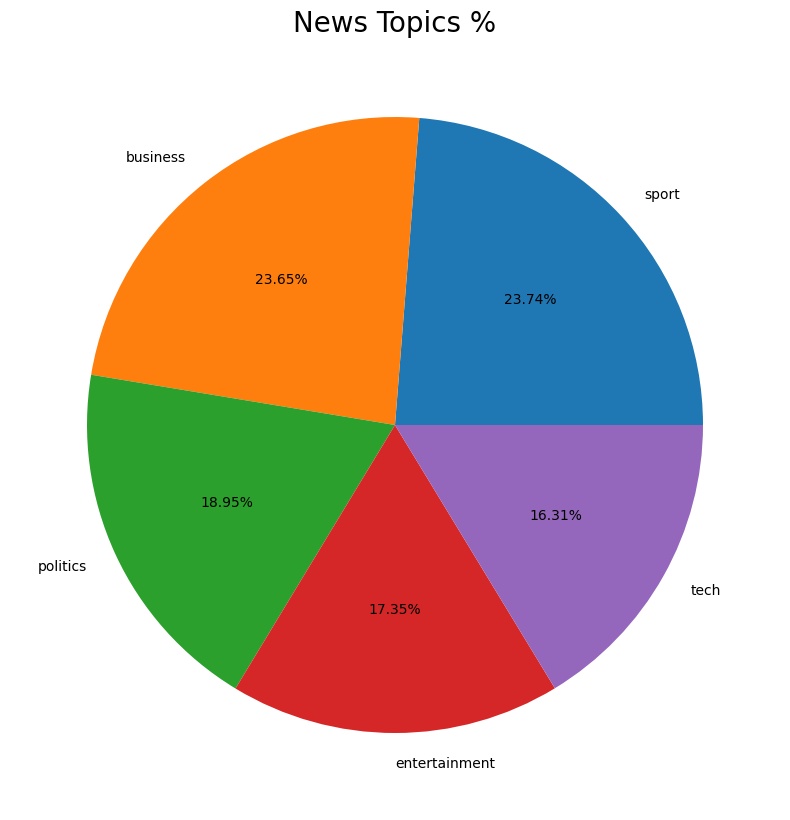

In [23]:
# understanding the different topic percentage through pie chart
plt.figure(figsize = (10,10))
plt.pie(data, autopct = '%0.2f%%' , labels = data.index)
plt.title('News Topics %', size = 20)
plt.show()

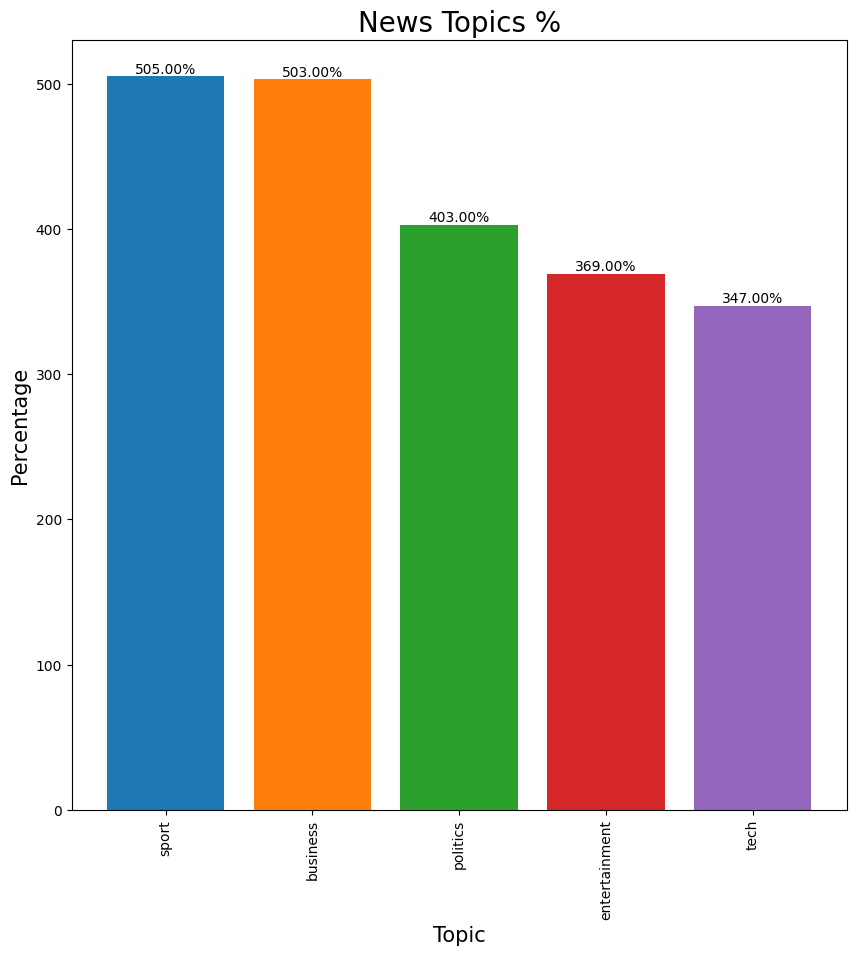

In [24]:
# understanding though bar plot
# define a list of colors for each topic
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(10, 10))
plt.bar(data.index, data.values, color=colors)
plt.title('News Topics %', size=20)
plt.xlabel('Topic', size=15)
plt.ylabel('Percentage', size=15)

# add value labels to the bars
for i, value in enumerate(data.values):
  plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()


## **NLP Text Processing**

In [25]:
# viewing the data in news_text column
data_df['News_text'][0]

b'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (\xc2\xa3600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will tr

In [26]:
 # Getting data from any html tags if present
data_df['News_text'] = [BeautifulSoup(k).get_text() for k in data_df['News_text'] ]

In [27]:
# Removing any urls present
data_df['News_text'] = [re.sub(r'https?://\S+|www\.\S+', '', k1) for k1 in data_df['News_text']]

In [28]:
# Checking the data after this processing
data_df['News_text']

0       Ad sales boost Time Warner profit\n\nQuarterly...
1       Dollar gains on Greenspan speech\n\nThe dollar...
2       Yukos unit buyer faces loan claim\n\nThe owner...
3       High fuel prices hit BA's profits\n\nBritish A...
4       Pernod takeover talk lifts Domecq\n\nShares in...
                              ...                        
2219    New consoles promise big problems\n\nMaking ga...
2220    BT program to beat dialler scams\n\nBT is intr...
2222    Be careful how you code\n\nA new European dire...
2223    US cyber security chief resigns\n\nThe man mak...
2224    Losing yourself in online gaming\n\nOnline rol...
Name: News_text, Length: 2127, dtype: object

In [29]:
data_df['News_text'][4]

"Pernod takeover talk lifts Domecq\n\nShares in UK drinks and food firm Allied Domecq have risen on speculation that it could be the target of a takeover by France's Pernod Ricard.\n\nReports in the Wall Street Journal and the Financial Times suggested that the French spirits firm is considering a bid, but has yet to contact its target. Allied Domecq shares in London rose 4% by 1200 GMT, while Pernod shares in Paris slipped 1.2%. Pernod said it was seeking acquisitions but refused to comment on specifics.\n\nPernod's last major purchase was a third of US giant Seagram in 2000, the move which propelled it into the global top three of drinks firms. The other two-thirds of Seagram was bought by market leader Diageo. In terms of market value, Pernod - at 7.5bn euros ($9.7bn) - is about 9% smaller than Allied Domecq, which has a capitalisation of Â£5.7bn ($10.7bn; 8.2bn euros). Last year Pernod tried to buy Glenmorangie, one of Scotland's premier whisky firms, but lost out to luxury goods f

**Removing Non-Word Characters**

In [30]:
# Replacing 'b\' character with ''
data_df['News_text']=[re.sub("b\' ","", k2) for k2 in data_df['News_text']]

In [31]:
data_df['News_text'][3]

'High fuel prices hit BA\'s profits\n\nBritish Airways has blamed high fuel prices for a 40% drop in profits.\n\nReporting its results for the three months to 31 December 2004, the airline made a pre-tax profit of £75m ($141m) compared with £125m a year earlier. Rod Eddington, BA\'s chief executive, said the results were "respectable" in a third quarter when fuel costs rose by £106m or 47.3%. BA\'s profits were still better than market expectation of £59m, and it expects a rise in full-year revenues.\n\nTo help offset the increased price of aviation fuel, BA last year introduced a fuel surcharge for passengers.\n\nIn October, it increased this from £6 to £10 one-way for all long-haul flights, while the short-haul surcharge was raised from £2.50 to £4 a leg. Yet aviation analyst Mike Powell of Dresdner Kleinwort Wasserstein says BA\'s estimated annual surcharge revenues - £160m - will still be way short of its additional fuel costs - a predicted extra £250m. Turnover for the quarter was

In [32]:
# Before cleaning ,so we checked how our data looks before nad after
news_data['News_text'][3]

b'High fuel prices hit BA\'s profits\n\nBritish Airways has blamed high fuel prices for a 40% drop in profits.\n\nReporting its results for the three months to 31 December 2004, the airline made a pre-tax profit of \xc2\xa375m ($141m) compared with \xc2\xa3125m a year earlier. Rod Eddington, BA\'s chief executive, said the results were "respectable" in a third quarter when fuel costs rose by \xc2\xa3106m or 47.3%. BA\'s profits were still better than market expectation of \xc2\xa359m, and it expects a rise in full-year revenues.\n\nTo help offset the increased price of aviation fuel, BA last year introduced a fuel surcharge for passengers.\n\nIn October, it increased this from \xc2\xa36 to \xc2\xa310 one-way for all long-haul flights, while the short-haul surcharge was raised from \xc2\xa32.50 to \xc2\xa34 a leg. Yet aviation analyst Mike Powell of Dresdner Kleinwort Wasserstein says BA\'s estimated annual surcharge revenues - \xc2\xa3160m - will still be way short of its additional fu

In [33]:
data_df['News_text'] = [re.sub(r"\\n\\n", " ",k3) for k3 in data_df['News_text']]             #Replacing other non-word characters
data_df['News_text'] = [re.sub(r"\\\'s", " ",k4) for k4 in data_df['News_text']] 
data_df['News_text'] = [re.sub(r"\\\'", " ", k5) for k5 in data_df['News_text']]
data_df['News_text'] = [re.sub(r"\\n\'", " ", k6) for k6 in data_df['News_text']]
data_df['News_text'] = [re.sub(r"\n\n", " ", k7) for k7 in data_df['News_text']]
data_df['News_text'] = [re.sub(r'\\xc2\\xa3','\xA3', k8) for k8 in data_df['News_text']]       # "\xA3" is unicode for symbol pound(£)   
data_df['News_text'] = [re.sub(r"\'s",'', k9) for k9 in data_df['News_text']] 
data_df['News_text'] = [re.sub(r'\\n"','', k10) for k10 in data_df['News_text']] 
data_df['News_text'] = [re.sub(r'b"','', k11) for k11 in data_df['News_text']] 
data_df['News_text'] = [re.sub(r'\n','', k12) for k12 in data_df['News_text']]

In [34]:
# Checking the data after removing
data_df['News_text'][5]

'Japan narrowly escapes recession Japan economy teetered on the brink of a technical recession in the three months to September, figures show. Revised figures indicated growth of just 0.1% - and a similar-sized contraction in the previous quarter. On an annual basis, the data suggests annual growth of just 0.2%, suggesting a much more hesitant recovery than had previously been thought. A common technical definition of a recession is two successive quarters of negative growth. The government was keen to play down the worrying implications of the data. "I maintain the view that Japan economy remains in a minor adjustment phase in an upward climb, and we will monitor developments carefully," said economy minister Heizo Takenaka. But in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead, observers were less sanguine. "It painting a picture of a recovery... much patchier than previously thought," said Paul Sheard, economi

In [35]:
# Checking the data before removing
news_data['News_text'][5]

b'Japan narrowly escapes recession\n\nJapan\'s economy teetered on the brink of a technical recession in the three months to September, figures show.\n\nRevised figures indicated growth of just 0.1% - and a similar-sized contraction in the previous quarter. On an annual basis, the data suggests annual growth of just 0.2%, suggesting a much more hesitant recovery than had previously been thought. A common technical definition of a recession is two successive quarters of negative growth.\n\nThe government was keen to play down the worrying implications of the data. "I maintain the view that Japan\'s economy remains in a minor adjustment phase in an upward climb, and we will monitor developments carefully," said economy minister Heizo Takenaka. But in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead, observers were less sanguine. "It\'s painting a picture of a recovery... much patchier than previously thought," said P

### Creating a function to remove punctuations

In [36]:
# Checking the string in the dataset
string.punctuation   

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
# Creating a function to remove punctuations from our dataset
def remo_punct(text):
  """This function will remove punctuations."""
  text_no_punct = [char for char in text if char not in '!"#$%&\'()*+,-./:;?@[\\]^_{|}~`£' ]
  text_no_punct = ''.join(text_no_punct)
  return text_no_punct

In [38]:
# applying through lambda function
data_df['News_text'] = data_df['News_text'].apply(lambda x: remo_punct(x))

In [39]:
data_df['News_text'][5]

'Japan narrowly escapes recession Japan economy teetered on the brink of a technical recession in the three months to September figures show Revised figures indicated growth of just 01  and a similarsized contraction in the previous quarter On an annual basis the data suggests annual growth of just 02 suggesting a much more hesitant recovery than had previously been thought A common technical definition of a recession is two successive quarters of negative growth The government was keen to play down the worrying implications of the data I maintain the view that Japan economy remains in a minor adjustment phase in an upward climb and we will monitor developments carefully said economy minister Heizo Takenaka But in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead observers were less sanguine It painting a picture of a recovery much patchier than previously thought said Paul Sheard economist at Lehman Brothers in Tok

In [40]:
# Lowercasing the whole dataset 
data_df['News_text']=[l.lower() for l in data_df['News_text']]
data_df["News_text"][5]

'japan narrowly escapes recession japan economy teetered on the brink of a technical recession in the three months to september figures show revised figures indicated growth of just 01  and a similarsized contraction in the previous quarter on an annual basis the data suggests annual growth of just 02 suggesting a much more hesitant recovery than had previously been thought a common technical definition of a recession is two successive quarters of negative growth the government was keen to play down the worrying implications of the data i maintain the view that japan economy remains in a minor adjustment phase in an upward climb and we will monitor developments carefully said economy minister heizo takenaka but in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead observers were less sanguine it painting a picture of a recovery much patchier than previously thought said paul sheard economist at lehman brothers in tok

In [42]:
# Removing extra spaces betwwen words if any
data_df['News_text'] = [re.sub(r'  ','', ext_sp) for ext_sp in data_df['News_text']]
data_df['News_text'][5] 

'japan narrowly escapes recession japan economy teetered on the brink of a technical recession in the three months to september figures show revised figures indicated growth of just 01and a similarsized contraction in the previous quarter on an annual basis the data suggests annual growth of just 02 suggesting a much more hesitant recovery than had previously been thought a common technical definition of a recession is two successive quarters of negative growth the government was keen to play down the worrying implications of the data i maintain the view that japan economy remains in a minor adjustment phase in an upward climb and we will monitor developments carefully said economy minister heizo takenaka but in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead observers were less sanguine it painting a picture of a recovery much patchier than previously thought said paul sheard economist at lehman brothers in tokyo

In [43]:
# Removing numbers present in our dataset if any
data_df['News_text']=[re.sub(r'\d+','',num) for num in data_df['News_text']]
data_df['News_text'][5]

'japan narrowly escapes recession japan economy teetered on the brink of a technical recession in the three months to september figures show revised figures indicated growth of just and a similarsized contraction in the previous quarter on an annual basis the data suggests annual growth of just  suggesting a much more hesitant recovery than had previously been thought a common technical definition of a recession is two successive quarters of negative growth the government was keen to play down the worrying implications of the data i maintain the view that japan economy remains in a minor adjustment phase in an upward climb and we will monitor developments carefully said economy minister heizo takenaka but in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead observers were less sanguine it painting a picture of a recovery much patchier than previously thought said paul sheard economist at lehman brothers in tokyo imp

### Tokenization

In [44]:
# Creating a function for Tokenization Process
def tokenize(text):
  ''' This function gives list of tokens.'''
  tokens = re.split('\W+', text)
  return tokens

In [45]:
# Applying the function to our dataset
data_df['Tokens'] = data_df['News_text'].apply(tokenize)
data_df.head(4)

,News_text,News_Theme,Tokens
0,ad sales boost time warner profit quarterly pr...,business,"[ad, sales, boost, time, warner, profit, quart..."
1,dollar gains on greenspan speech the dollar ha...,business,"[dollar, gains, on, greenspan, speech, the, do..."
2,yukos unit buyer faces loan claim the owners o...,business,"[yukos, unit, buyer, faces, loan, claim, the, ..."
3,high fuel prices hit ba profits british airway...,business,"[high, fuel, prices, hit, ba, profits, british..."


## Removing stopwords

In [46]:
# Extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
data_df['News_text']

0       ad sales boost time warner profit quarterly pr...
1       dollar gains on greenspan speech the dollar ha...
2       yukos unit buyer faces loan claim the owners o...
3       high fuel prices hit ba profits british airway...
4       pernod takeover talk lifts domecq shares in uk...
                              ...                        
2219    new consoles promise big problems making games...
2220    bt program to beat dialler scams bt is introdu...
2222    be careful how you code a new european directi...
2223    us cyber security chief resigns the man making...
2224    losing yourself in online gaming online role p...
Name: News_text, Length: 2127, dtype: object

In [47]:
# Creating a function to remove stopwords
def remove_sw(tokenized_list):
  '''This function will remove stopwords.'''
  text = [word for word in tokenized_list if word not in sw]
  return text

In [48]:
# applying the function to our dataset
data_df['Tokens(without stop words)'] = data_df['Tokens'].apply(remove_sw)
data_df.head(5)

,News_text,News_Theme,Tokens,Tokens(without stop words)
0,ad sales boost time warner profit quarterly pr...,business,"[ad, sales, boost, time, warner, profit, quart...","[ad, sales, boost, time, warner, profit, quart..."
1,dollar gains on greenspan speech the dollar ha...,business,"[dollar, gains, on, greenspan, speech, the, do...","[dollar, gains, greenspan, speech, dollar, hit..."
2,yukos unit buyer faces loan claim the owners o...,business,"[yukos, unit, buyer, faces, loan, claim, the, ...","[yukos, unit, buyer, faces, loan, claim, owner..."
3,high fuel prices hit ba profits british airway...,business,"[high, fuel, prices, hit, ba, profits, british...","[high, fuel, prices, hit, ba, profits, british..."
4,pernod takeover talk lifts domecq shares in uk...,business,"[pernod, takeover, talk, lifts, domecq, shares...","[pernod, takeover, talk, lifts, domecq, shares..."


In [49]:
# Creating an another column to see the news without stopwords
data_df['News_without_stopwords'] = [' '.join(word) for word in data_df['Tokens(without stop words)']]
data_df.head(3)

,News_text,News_Theme,Tokens,Tokens(without stop words),News_without_stopwords
0,ad sales boost time warner profit quarterly pr...,business,"[ad, sales, boost, time, warner, profit, quart...","[ad, sales, boost, time, warner, profit, quart...",ad sales boost time warner profit quarterly pr...
1,dollar gains on greenspan speech the dollar ha...,business,"[dollar, gains, on, greenspan, speech, the, do...","[dollar, gains, greenspan, speech, dollar, hit...",dollar gains greenspan speech dollar hit highe...
2,yukos unit buyer faces loan claim the owners o...,business,"[yukos, unit, buyer, faces, loan, claim, the, ...","[yukos, unit, buyer, faces, loan, claim, owner...",yukos unit buyer faces loan claim owners embat...


## Lemmatization

In [50]:
# creating a object lemmatizer
lemmatizer = WordNetLemmatizer()

In [51]:
# creating a function for lemmetization 
def lemmatizing(news):
  '''This function will lemmatize each word in news.'''
  text = [lemmatizer.lemmatize(word) for word in news.split()]
  return text

In [52]:
# applying the function to our dataset
data_df['lemmatized_tokens(no_sw)'] = data_df['News_without_stopwords'].apply(lemmatizing)

In [53]:
# creating a new column after lemmetizing
data_df['Lemm_news'] = [' '.join(word) for word in data_df['lemmatized_tokens(no_sw)']]

In [54]:
data_df.head(2)

,News_text,News_Theme,Tokens,Tokens(without stop words),News_without_stopwords,lemmatized_tokens(no_sw),Lemm_news
0,ad sales boost time warner profit quarterly pr...,business,"[ad, sales, boost, time, warner, profit, quart...","[ad, sales, boost, time, warner, profit, quart...",ad sales boost time warner profit quarterly pr...,"[ad, sale, boost, time, warner, profit, quarte...",ad sale boost time warner profit quarterly pro...
1,dollar gains on greenspan speech the dollar ha...,business,"[dollar, gains, on, greenspan, speech, the, do...","[dollar, gains, greenspan, speech, dollar, hit...",dollar gains greenspan speech dollar hit highe...,"[dollar, gain, greenspan, speech, dollar, hit,...",dollar gain greenspan speech dollar hit highes...


In [55]:
data_df['Lemm_news'][5]

'japan narrowly escape recession japan economy teetered brink technical recession three month september figure show revised figure indicated growth similarsized contraction previous quarter annual basis data suggests annual growth suggesting much hesitant recovery previously thought common technical definition recession two successive quarter negative growth government keen play worrying implication data maintain view japan economy remains minor adjustment phase upward climb monitor development carefully said economy minister heizo takenaka face strengthening yen making export le competitive indication weakening economic condition ahead observer le sanguine painting picture recovery much patchier previously thought said paul sheard economist lehman brother tokyo improvement job market apparently yet feed domestic demand private consumption third quarter'

## Removing the Frequent words

In [56]:
# Storing the words in a list
all_words = ''.join(data_df['Lemm_news']).split() 

In [58]:
# Converting this to a list
all_words = pd.Series(all_words)
# checking the value counts of those lemma news
all_words.value_counts()[:20]

said          6820
mr            2897
year          2654
would         2452
also          2035
people        1871
new           1854
u             1806
one           1699
could         1433
game          1398
time          1374
last          1319
first         1222
say           1201
government    1154
world         1148
two           1131
company       1053
film          1013
dtype: int64

In [60]:
useless_words = ['said','say', 'mr','would','make','also','year','take','could','use','time','go','u','two','told']
data_df['Lemm_news'][0]

'ad sale boost time warner profit quarterly profit u medium giant timewarner jumped bn âm three month december yearearlier firm one biggest investor google benefited sale highspeed internet connection higher advert sale timewarner said fourth quarter sale rose bn bn profit buoyed oneoff gain offset profit dip warner bros le user aol time warner said friday owns searchengine google internet business aol mixed fortune lost subscriber fourth quarter profit lower preceding three quarter however company said aol underlying profit exceptional item rose back stronger internet advertising revenue hope increase subscriber offering online service free timewarner internet customer try sign aol existing customer highspeed broadband timewarner also restate result following probe u security exchange commission sec close concluding time warner fourth quarter profit slightly better analyst expectation film division saw profit slump helped boxoffice flop alexander catwoman sharp contrast yearearlier th

In [61]:
# checking the length before removing
len(data_df['Lemm_news'][0].split())

240

In [62]:
# Defining function to remove useless words
def remove_words(us_wo):
  '''Function to remove useless_words.'''
  return ' '.join(x for x in us_wo.split() if x not in useless_words)

In [65]:
# applying the function to our dataset
data_df['Lemm_news'] = data_df['Lemm_news'].apply(remove_words)
data_df['Lemm_news'][0]

'ad sale boost warner profit quarterly profit medium giant timewarner jumped bn âm three month december yearearlier firm one biggest investor google benefited sale highspeed internet connection higher advert sale timewarner fourth quarter sale rose bn bn profit buoyed oneoff gain offset profit dip warner bros le user aol warner friday owns searchengine google internet business aol mixed fortune lost subscriber fourth quarter profit lower preceding three quarter however company aol underlying profit exceptional item rose back stronger internet advertising revenue hope increase subscriber offering online service free timewarner internet customer try sign aol existing customer highspeed broadband timewarner restate result following probe security exchange commission sec close concluding warner fourth quarter profit slightly better analyst expectation film division saw profit slump helped boxoffice flop alexander catwoman sharp contrast yearearlier third final film lord ring trilogy booste

In [67]:
# checking the length after removing
len(data_df['Lemm_news'][0].split())

227

In [68]:
# splitting new words after removing useless words
new_words = ''.join(data_df['Lemm_news']).split()
## Again converting to series after useless words are removed
new_words = pd.Series(new_words)
# Checking the value counts of new words
new_list = new_words.value_counts()
new_list

people            1871
new               1854
one               1699
game              1398
last              1311
                  ... 
shocker              1
sustainreform        1
firmsincluding       1
measuresection       1
dayslol              1
Length: 31954, dtype: int64

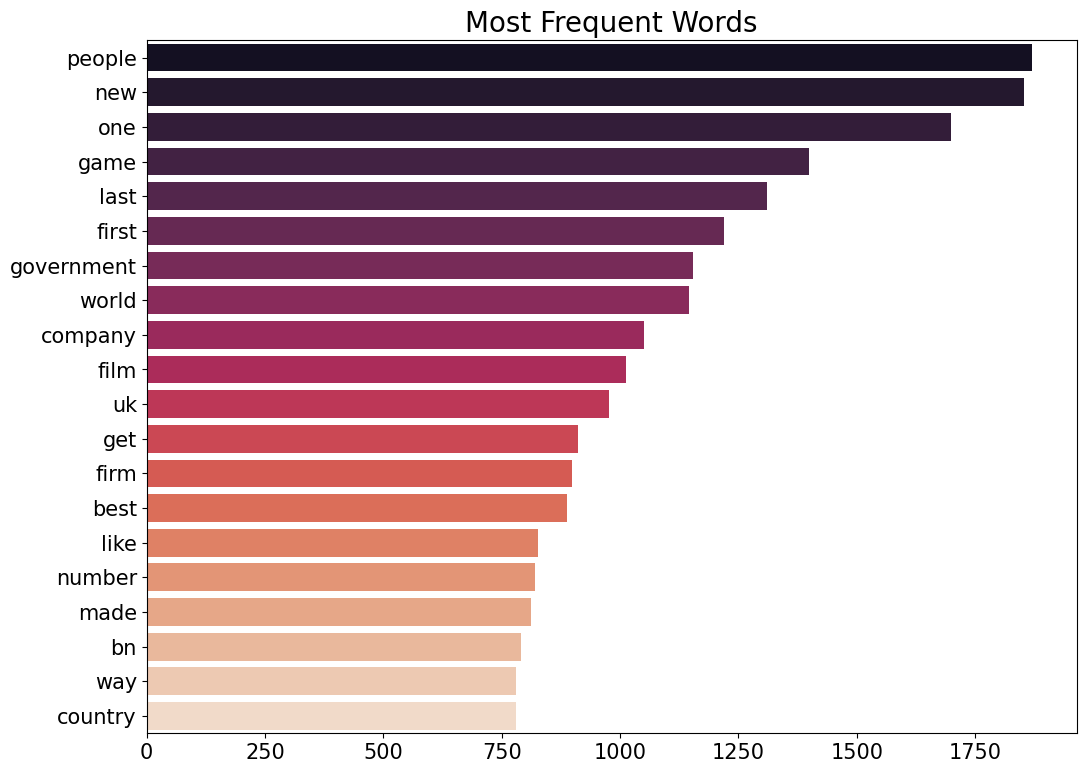

In [70]:
# Plotting the bar plot for this word count
plt.figure(figsize = (12,9))
sns.barplot(x = new_list[:20], y = new_list.index[:20] , palette = 'rocket')
plt.title('Most Frequent Words' , size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()


In [72]:
# Joining for wordcloud operation
lemmatized_news = ''.join(data_df['Lemm_news'])

Understanding through WORDCLOUD

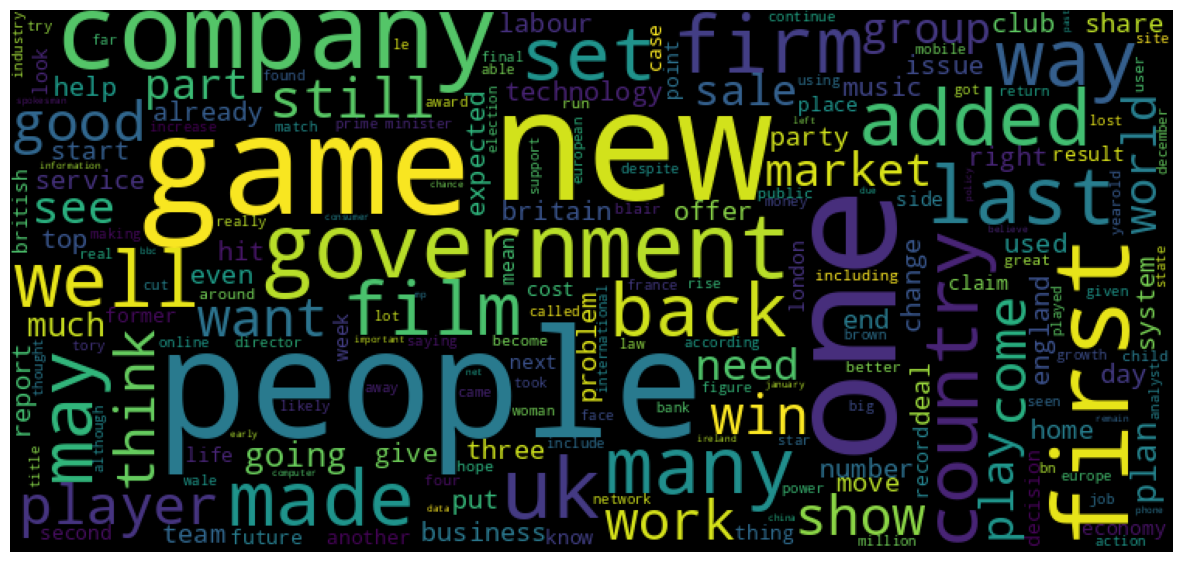

In [80]:
plt.figure(figsize = (15,15))
word_cloud = WordCloud(width= 750,height= 350,background_color ='black',max_font_size=100).generate(lemmatized_news)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [104]:
# To see the dataset of maximum column
pd.set_option('display.max_colwidth', None)

## Text Vectorization : CountVectorizer

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

In [111]:
count_vectorizer = CountVectorizer()
text_data=data_df["Lemm_news"]
count_matrix = count_vectorizer.fit_transform(text_data)

# print the count matrix
print(count_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
